**Alireza Habibzadeh** \\
Student No.`99109393`

You can view/run this notebook here:

https://colab.research.google.com/drive/1gibdYWfHGL3MBXFxb1QQUwQGh9Bv68Ak?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot(f, t, f_name, t_name='t'):
    plt.plot(t, f)
    plt.xlabel(t_name)
    plt.ylabel(f_name)
    plt.show()

# 1

In [ ]:
def x1(t):
    return np.cos(10*np.pi*t + 0.001*np.pi)


## الف

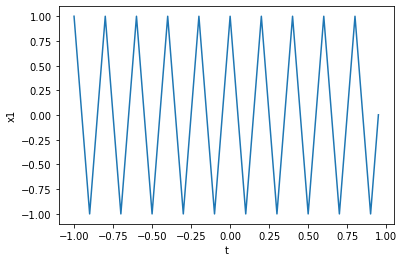

In [ ]:
sampling_freq = 20.0
t0 = 1/sampling_freq

t1 = np.arange(-1.0, 1.0, t0)

s1 = x1(t1)

plot(s1, t1, 'x1')


## ب

In [108]:
def plot_fft(function, sampling_freq):
    count = len(function)
    period = count/sampling_freq
    freqs = np.arange(-int(count/2), int(count/2))/period

    x_fft = np.fft.fft(function)/count
    x_fft_abs = np.absolute(x_fft)

    plot(x_fft_abs, freqs, '| FFT(x) |')
    #plot(np.angle(x_fft), freqs, f'∠ FFT(x)')

    return x_fft, freqs


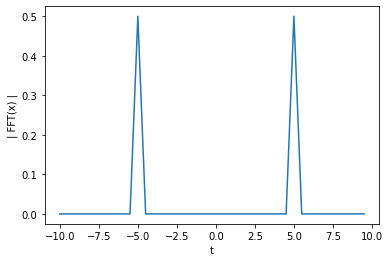

In [109]:
x_fft, freqs = plot_fft(s1, sampling_freq)

## ج

In [110]:
def lowpass(t, cutoff):
    return np.vectorize(lambda x : 1.0 if (-cutoff <= x and x <= cutoff) else 0.0)(t)
    

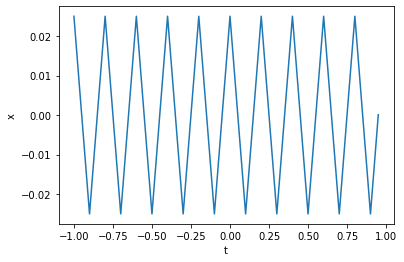

In [117]:
X = lowpass(freqs, 6) * x_fft

x = np.fft.ifft(X)
# Ignoring small imaginary parts caused by numerical errors
x = np.real(x)

plot(x, t1, 'x')


## د

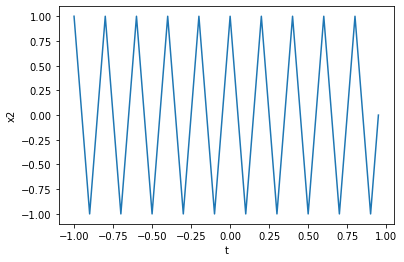

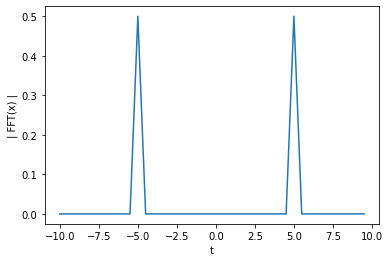

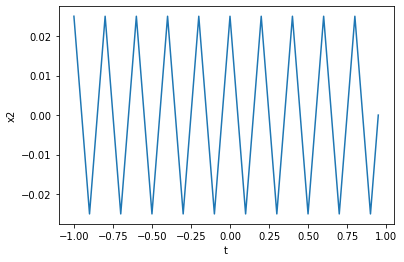

In [118]:
def x2(t):
    return np.cos(30*np.pi*t)

s2 = x2(t1)

plot(s2, t1, 'x2')
x2_fft, freqs2 = plot_fft(s2, sampling_freq)

X2 = lowpass(freqs2, 6) * x2_fft

x2 = np.fft.ifft(X2)
# Ignoring small imaginary parts caused by numerical errors
x2 = np.real(x2)

plot(x2, t1, 'x2')


دلیل این اتفاق این است که سیگنال اصلی ما فرکانس بالایی دارد ولی ما با فرکانس پایینی نمونه‌برداری را انجام دادیم.
این کار باعث شده تا پس از نمونه‌برداری 
(سمپلینگ)
دقیقا نقاطی را برداریم که مطابق یک سیگنال سینوسی دیگر با فرکانس پایین‌تر از فرکانس سمپلینگ است. پس از فوریه‌ی وارون،
آن سیگنال کم‌فرکانس که همان سیگنال ورودی بخش قبل بود را اشتباهی گرفتیم و نتوانستیم سیگنال اصلی را بازسازی کنیم.

برای حل این مشکل (البته اگر مشکل است) باید فرکانس سمپلینگ بالاتری انتخاب کرد.

# 2

In [141]:
def m(t, t0):
    sinc = np.sinc(t)
    constraint = np.vectorize(lambda x : 1.0 if (0.0 <= x and x <= t0) else 0.0)
    return constraint(t)*sinc

def c(t):
    f = 250 # Hz
    return np.cos(2*np.pi*f*t)

## الف

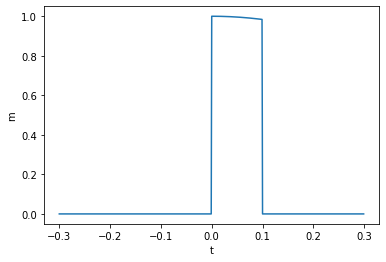

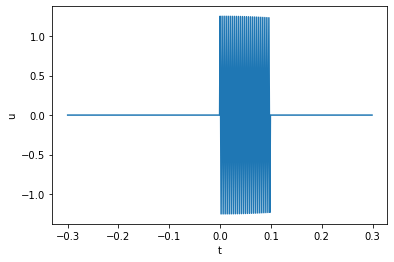

In [142]:
t0 = 0.001
t1 = np.arange(-0.3, 0.3, t0)

m_t = m(t1, 0.1)
plot(m_t, t1, 'm')

u = ((1/0.8)*c(t1))*m_t
plot(u, t1, 'u')

# ب

m FFT abs:


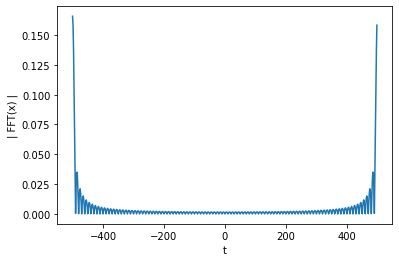

u FFT abs:


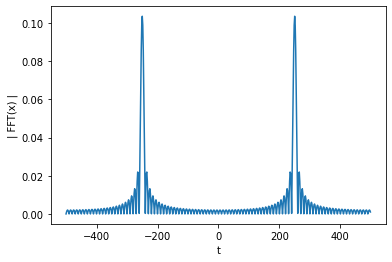

In [143]:
print('m FFT abs:')
_ = plot_fft(m_t, 1/t0)
print('u FFT abs:')
_ = plot_fft(u, 1/t0)

# ج

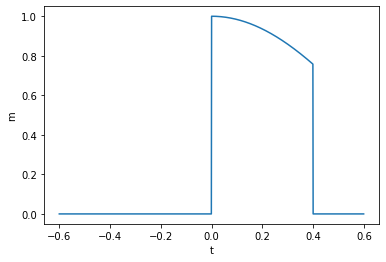

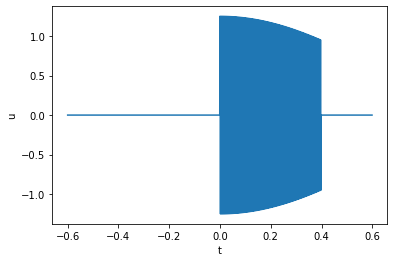

In [145]:
t0 = 0.001
t1 = np.arange(-0.6, 0.6, t0)

m_t = m(t1, 0.4)
plot(m_t, t1, 'm')

u = ((1/0.8)*c(t1))*m_t
plot(u, t1, 'u')

m FFT abs:


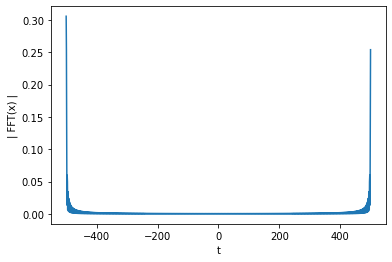

u FFT abs:


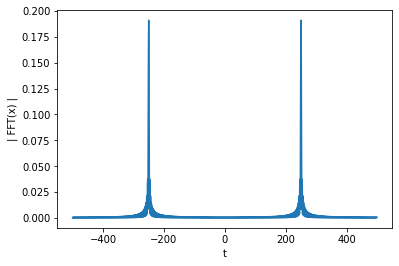

In [146]:
print('m FFT abs:')
_ = plot_fft(m_t, 1/t0)
print('u FFT abs:')
_ = plot_fft(u, 1/t0)

با زیاد شدن \\
$t_0$ \\
از ۰.۱ تا
۰.۴
مشاهده می‌کنیم که توزیع فرکانسی سیگنال مدوله شده در نزدیکی فرکانس سیگنال حامل تیزتر می‌شود.
یعنی سیگنال حامل ما سیگنال بهتری برای حمل سیگنال اصلی است.
در واقع با نگاه به توزیع فرکانسی سیگنال اصلی مشاهده می‌کنیم که با زیاد شدن\\
$t_0$ \\
فرکانس‌هایی که در نزدیکی فرکانس سیگنال حامل دارد کمتر می‌شود.

با مشاهده‌ی نمودار خود سیگنال مدوله شده هم معلوم است که سیگنال مدوله شده بهتر خود سیگنال اصلی را نشان می‌دهد و نوسانات سیگنال حامل آنقدر سریع رخ می‌دهد که نمودار توپر به نظر می‌رسد.